# Matrix Condition Number and Roundoff Error

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WCC-Engineering/ENGR240/blob/main/Class%20Demos%20and%20Activities/Week%204/Matrix_Condition_Number_Demo.ipynb)

## Introduction

In this notebook, we'll explore the concept of **matrix condition number** and how it affects the numerical solution of linear systems of equations. We'll specifically focus on:

1. What makes a matrix "ill-conditioned"
2. How roundoff error accumulates in ill-conditioned systems
3. How to check the condition number of a matrix
4. Basic techniques to improve numerical stability

In [11]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import cond, solve, norm, inv

# Set random seed for reproducibility
np.random.seed(42)

# Configure plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.5)

# Set precision for display
np.set_printoptions(precision=8, suppress=True)

## What is the Condition Number?

The **condition number** of a matrix measures how sensitive the solution of a linear system is to small changes or errors in the input data.

For a matrix $A$, the condition number is defined as:

$$\kappa(A) = ||A|| \cdot ||A^{-1}||$$

where $||\cdot||$ represents a matrix norm (commonly the 2-norm).

- A matrix with a **low condition number** (close to 1) is **well-conditioned**. Small changes in the input result in small changes in the output.
- A matrix with a **high condition number** is **ill-conditioned**. Small changes in the input can cause large changes in the output.
- A matrix with an **infinite condition number** is **singular** (not invertible).

## Example 1: Well-Conditioned Matrix

Let's start with a well-conditioned matrix and see how it behaves when solving a linear system.

In [21]:
# Create a 10x10 well-conditioned matrix (example from ODE solution method)
n = 10

# Initialize pentadiagonal matrix with zeros
A_well = np.zeros((n, n))

# Coefficients for pentadiagonal matrix (typical for 4th order finite difference)
coefficients = [1, -4, 6, -4, 1]

# Fill the pentadiagonal matrix
for i in range(n):
    for j in range(max(0, i-2), min(n, i+3)):
        # Calculate the diagonal offset (-2, -1, 0, 1, or 2)
        offset = j - i
        # Set the value using the appropriate coefficient
        A_well[i, j] = coefficients[offset + 2]

# True solution we want to recover
x_true = np.ones(n)

# Calculate the right-hand side
b = A_well @ x_true

print("Matrix A (well-conditioned):")
print(A_well)
print("\nRight-hand side b:")
print(b)

# Calculate the condition number
cond_number = cond(A_well)
print(f"\nCondition number: {cond_number:.4f}")

# Solve the system
x_computed = solve(A_well, b)
print("\nComputed solution:")
print(x_computed)

# Calculate the error
error = norm(x_true - x_computed) / norm(x_true)
print(f"\nRelative error: {error:.8e}")

Matrix A (well-conditioned):
[[ 6. -4.  1.  0.  0.  0.  0.  0.  0.  0.]
 [-4.  6. -4.  1.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  6. -4.  1.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  6. -4.  1.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  6. -4.  1.  0.  0.  0.]
 [ 0.  0.  0.  1. -4.  6. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  1. -4.  6. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  1. -4.  6. -4.  1.]
 [ 0.  0.  0.  0.  0.  0.  1. -4.  6. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -4.  6.]]

Right-hand side b:
[ 3. -1.  0.  0.  0.  0.  0.  0. -1.  3.]

Condition number: 633.2602

Computed solution:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Relative error: 4.14575771e-15


Now, let's introduce some small perturbation to the right-hand side and see how it affects the solution:

In [22]:
# Add a small perturbation to b (simulating measurement error or roundoff)
delta = 1e-10
b_perturbed = b + delta * np.random.randn(n_well)

# Solve with the perturbed right-hand side
x_perturbed = solve(A_well, b_perturbed)

# Calculate the relative change in the solution
input_change = norm(b - b_perturbed) / norm(b)
output_change = norm(x_computed - x_perturbed) / norm(x_computed)

print(f"Relative change in input (b): {input_change:.8e}")
print(f"Relative change in output (x): {output_change:.8e}")
print(f"Ratio of output change to input change: {output_change/input_change:.4f}")

Relative change in input (b): 7.54521349e-11
Relative change in output (x): 3.17082291e-09
Ratio of output change to input change: 42.0243


For a well-conditioned matrix, the relative change in the solution is similar in magnitude to the relative change in the input data. The ratio is close to the condition number.

## Example 2: Severely Ill-Conditioned Matrix

Now, let's examine a severely ill-conditioned matrix and observe how it amplifies errors.

In [14]:
# Create a Hilbert matrix - a classic example of an ill-conditioned matrix
# The Hilbert matrix H has elements H[i,j] = 1/(i+j+1)
def hilbert_matrix(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1.0 / (i + j + 1)
    return H

# Create a 10x10 Hilbert matrix for more pronounced effects
n = 10
A_ill = hilbert_matrix(n)

# Create a simple true solution - all ones
x_true_ill = np.ones(n)

# Calculate right-hand side
b_ill = A_ill @ x_true_ill

print("Hilbert matrix (ill-conditioned, showing first 5x5 corner):")
print(A_ill[:5, :5])

# Calculate the condition number
cond_number_ill = cond(A_ill)
print(f"\nCondition number: {cond_number_ill:.4e}")

# Solve the system using double precision
x_computed_ill = solve(A_ill, b_ill)

print("\nTrue solution (first 5 elements):")
print(x_true_ill[:5])

print("\nComputed solution (first 5 elements):")
print(x_computed_ill[:5])

# Calculate the element-wise absolute errors
abs_errors = np.abs(x_true_ill - x_computed_ill)
print("\nAbsolute errors (first 5 elements):")
print(abs_errors[:5])

# Calculate the relative error
error_ill = norm(x_true_ill - x_computed_ill) / norm(x_true_ill)
print(f"\nRelative error: {error_ill:.8e}")

Hilbert matrix (ill-conditioned, showing first 5x5 corner):
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

Condition number: 1.6024e+13

True solution (first 5 elements):
[1. 1. 1. 1. 1.]

Computed solution (first 5 elements):
[1.         0.99999996 1.00000087 0.99999211 1.00003756]

Absolute errors (first 5 elements):
[0.         0.00000004 0.00000087 0.00000789 0.00003756]

Relative error: 8.67039024e-05


Let's add a small perturbation and observe its effect:

In [15]:
# Add a small perturbation to b_ill
delta_ill = 1e-10
np.random.seed(123)  # Set seed for reproducibility
perturbation = delta_ill * np.random.randn(n)
b_perturbed_ill = b_ill + perturbation

# Solve with the perturbed right-hand side
x_perturbed_ill = solve(A_ill, b_perturbed_ill)

# Calculate the relative changes
input_change_ill = norm(b_ill - b_perturbed_ill) / norm(b_ill)
output_change_ill = norm(x_computed_ill - x_perturbed_ill) / norm(x_computed_ill)

print(f"Relative change in input (b): {input_change_ill:.8e}")
print(f"Relative change in output (x): {output_change_ill:.8e}")
print(f"Ratio of output change to input change: {output_change_ill/input_change_ill:.4e}")

# Compare this ratio to the condition number
print(f"Condition number: {cond_number_ill:.4e}")

# Calculate errors of perturbed solution vs true solution
perturbed_error = norm(x_true_ill - x_perturbed_ill) / norm(x_true_ill)
print(f"\nRelative error of perturbed solution: {perturbed_error:.8e}")

Relative change in input (b): 8.49574574e-11
Relative change in output (x): 4.15856406e+02
Ratio of output change to input change: 4.8949e+12
Condition number: 1.6024e+13

Relative error of perturbed solution: 4.15856321e+02


Let's create a more effective visualization that shows both the small differences between the true and computed solutions, and the dramatic effect of the perturbation:

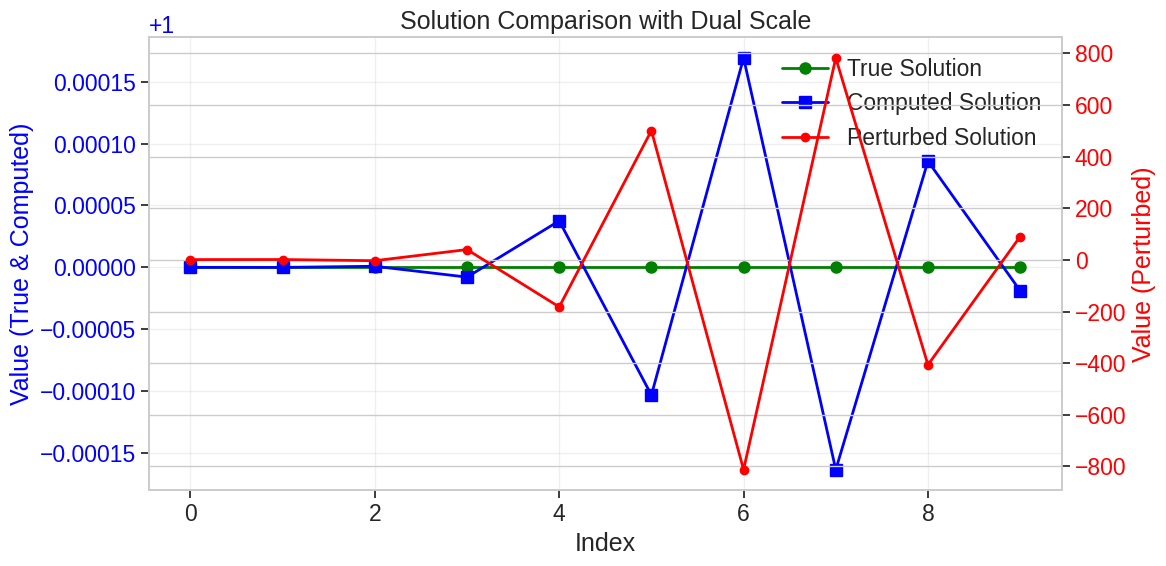

In [16]:
# Create visualization with dual y-axis to properly show the scale differences
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis for true and computed solutions
indices = np.arange(n)
ax1.plot(indices, x_true_ill, 'go-', label='True Solution', linewidth=2, markersize=8)
ax1.plot(indices, x_computed_ill, 'bs-', label='Computed Solution', linewidth=2, markersize=8)
ax1.set_xlabel('Index')
ax1.set_ylabel('Value (True & Computed)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, alpha=0.3)

# Secondary y-axis for perturbed solution (which has much larger magnitude)
ax2 = ax1.twinx()
ax2.plot(indices, x_perturbed_ill, 'ro-', label='Perturbed Solution', linewidth=2)
ax2.set_ylabel('Value (Perturbed)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
plt.title('Solution Comparison')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

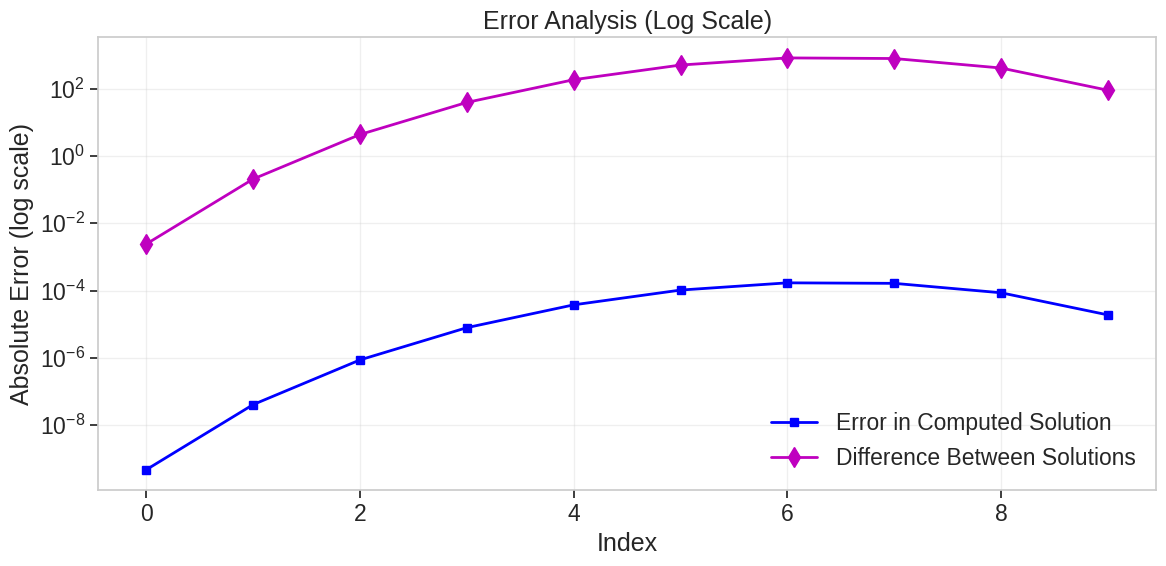

In [17]:
# Visualization of errors on log scale
error_computed = np.abs(x_true_ill - x_computed_ill)
diff_solutions = np.abs(x_computed_ill - x_perturbed_ill)

plt.figure(figsize=(12, 6))
plt.semilogy(indices, error_computed, 'bs-', label='Error in Computed Solution', linewidth=2)
plt.semilogy(indices, diff_solutions, 'md-', label='Difference Between Solutions', linewidth=2, markersize=10)
plt.xlabel('Index')
plt.ylabel('Absolute Error (log scale)')
plt.title('Error Analysis (Log Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## How to Check Condition Number

In NumPy, you can check the condition number of a matrix using the `numpy.linalg.cond` function. Let's look at how to use it and interpret the results:

In [23]:
# Create matrices with different condition numbers
A1 = np.array([[1, 0], [0, 1]])  # Identity matrix: perfectly conditioned
A2 = np.array([[10, 1], [1, 10]])  # Well-conditioned
A3 = np.array([[1, 0.999], [0.999, 1]])  # Ill-conditioned
A4 = hilbert_matrix(8)  # Very ill-conditioned

# Calculate condition numbers
cond_A1 = cond(A1)
cond_A2 = cond(A2)
cond_A3 = cond(A3)
cond_A4 = cond(A4)

print(f"Condition number of identity matrix: {cond_A1:.4f}")
print(f"Condition number of well-conditioned matrix: {cond_A2:.4f}")
print(f"Condition number of ill-conditioned matrix: {cond_A3:.4e}")
print(f"Condition number of Hilbert matrix: {cond_A4:.4e}")

# Guidelines for interpreting condition numbers
print("\nInterpreting condition numbers:")
print("κ ≈ 1: Well-conditioned")
print("1 < κ < 1000: Moderately well-conditioned")
print("1000 ≤ κ < 10^6: Ill-conditioned")
print("κ ≥ 10^6: Very ill-conditioned")

Condition number of identity matrix: 1.0000
Condition number of well-conditioned matrix: 1.2222
Condition number of ill-conditioned matrix: 1.9990e+03
Condition number of Hilbert matrix: 1.5258e+10

Interpreting condition numbers:
κ ≈ 1: Well-conditioned
1 < κ < 1000: Moderately well-conditioned
1000 ≤ κ < 10^6: Ill-conditioned
κ ≥ 10^6: Very ill-conditioned


## Techniques to Improve Numerical Stability

When dealing with ill-conditioned matrices, several techniques can help improve numerical stability:

1. **Pivoting strategies** in Gaussian elimination
2. **Scaling** the matrix and right-hand side
3. Using **regularization** techniques
4. Employing more stable factorization methods like **SVD**

Let's implement a simple scaling approach and see how it affects the condition number:

In [ ]:
# Create an ill-conditioned matrix with widely varying magnitudes
A_unscaled = np.array([
    [1e5, 2e5],
    [3, 4]
])

print("Unscaled matrix:")
print(A_unscaled)
print(f"Condition number: {cond(A_unscaled):.4e}")

# Scale rows to have similar magnitudes
row_norms = np.array([norm(A_unscaled[i, :]) for i in range(A_unscaled.shape[0])])
D = np.diag(1.0 / row_norms)
A_scaled = D @ A_unscaled

print("\nScaled matrix:")
print(A_scaled)
print(f"Condition number: {cond(A_scaled):.4e}")

## Rule of Thumb: Digits of Accuracy

A practical rule of thumb: If a matrix has condition number $\kappa(A) = 10^k$, you can expect to lose up to $k$ digits of accuracy in the solution due to roundoff error.

For example, with a condition number of $10^6$, you might lose about 6 digits of accuracy in your solution.

For IEEE 754 double precision (which NumPy uses by default), you have about 15-16 decimal digits of precision. So if your condition number is $10^{12}$, you might have only 3-4 accurate digits in your solution, and if it's $10^{16}$ or larger, you can't expect any accurate digits!

## Practical Guidelines for Dealing with Ill-Conditioned Systems

1. **Always calculate the condition number** of the coefficient matrix before solving a linear system.

2. **Be cautious of results** when the condition number is high (> 10^6).

3. **Use higher precision** when possible for ill-conditioned problems.

4. **Consider scaling** the rows or columns of the matrix to improve conditioning.

5. **Use stable algorithms** like LU decomposition with pivoting or SVD for solving ill-conditioned systems.

6. **Reformulate the problem** if possible to avoid ill-conditioning.